In [42]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
# importing files
red_wine = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white_wine = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')

In [4]:
# adding columns to dataframe
red_wine['wine_type'] = 'red'
red_wine['quality_label'] = red_wine['quality'].apply(lambda value: 'low'
                                                      if value <= 5 else 'medium'
                                                      if value <= 7 else 'high')
red_wine['quality_label'] = pd.Categorical(red_wine['quality_label'],
                                           categories=['low', 'medium', 'high'])
red_wine[red_wine["quality"] > 6]
white_wine['wine_type'] = 'white'
white_wine['quality_label'] = white_wine['quality'].apply(lambda value: 'low'
                                                          if value <= 5 else 'medium'
                                                          if value <= 7 else 'high')
white_wine['quality_label'] = pd.Categorical(white_wine['quality_label'],
                                             categories=['low', 'medium', 'high'])
white_wine[white_wine["quality"] > 6]

# combine dataframes

wines = pd.concat([red_wine, white_wine])
# re-shuffle records just to randomize data points
wines = wines.sample(frac=1, random_state=42).reset_index(drop=True)

In [8]:
wines.head(10)


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.17         0.74            12.8      0.045   
1            7.7              0.64         0.21             2.2      0.077   
2            6.8              0.39         0.34             7.4      0.020   
3            6.3              0.28         0.47            11.2      0.040   
4            7.4              0.35         0.20            13.9      0.054   
5            7.2              0.53         0.14             2.1      0.064   
6            7.5              0.27         0.31            17.7      0.051   
7            6.8              0.11         0.27             8.6      0.044   
8            9.0              0.44         0.49             2.4      0.078   
9            7.1              0.23         0.30             2.6      0.034   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 24.0                 126.0  0.99420  3.26       0.38   
1                 32.0                 133.0  0.99560  3.27       0.45   
2                 38.0                 133.0  0.99212  3.18       0.44   
3                 61.0                 183.0  0.99592  3.12       0.51   
4                 63.0                 229.0  0.99888  3.11       0.50   
5                 15.0                  29.0  0.99323  3.35       0.61   
6                 33.0                 173.0  0.99900  3.09       0.64   
7                 45.0                 104.0  0.99454  3.20       0.37   
8                 26.0                 121.0  0.99780  3.23       0.58   
9                 62.0                 148.0  0.99121  3.03       0.56   

   alcohol  quality wine_type quality_label  
0     12.2        8     white          high  
1      9.9        5       red           low  
2     12.0        7     white        medium  
3      9.5        6     white        medium  
4      8.9        6     white        medium  
5     12.1        6       red        medium  
6     10.2        5     white           low  
7      9.9        6     white        medium  
8      9.2        5       red           low  
9     11.3        7     white        medium

In [9]:
wines.tail(10)


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
6487            6.1              0.22         0.46            1.80      0.160   
6488           10.3              0.50         0.42            2.00      0.069   
6489            6.4              0.31         0.53            8.80      0.057   
6490            5.9              0.26         0.24            2.40      0.046   
6491            8.0              0.34         0.49            9.00      0.033   
6492            7.6              0.32         0.58           16.75      0.050   
6493            5.6              0.28         0.27            3.90      0.043   
6494            6.4              0.37         0.20            5.60      0.117   
6495            6.5              0.26         0.50            8.00      0.051   
6496            7.2              0.62         0.06            2.70      0.077   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
6487                 34.0                  74.0  0.98840  3.19       0.33   
6488                 21.0                  51.0  0.99820  3.16       0.72   
6489                 36.0                 221.0  0.99642  3.17       0.44   
6490                 27.0                 132.0  0.99234  3.63       0.73   
6491                 39.0                 180.0  0.99360  3.13       0.38   
6492                 43.0                 163.0  0.99990  3.15       0.54   
6493                 52.0                 158.0  0.99202  3.35       0.44   
6494                 61.0                 183.0  0.99459  3.24       0.43   
6495                 46.0                 197.0  0.99536  3.18       0.47   
6496                 15.0                  85.0  0.99746  3.51       0.54   

      alcohol  quality wine_type quality_label  
6487     13.4        6     white        medium  
6488     11.5        6       red        medium  
6489      9.1        5     white           low  
6490     11.3        5     white           low  
6491     12.3        8     white          high  
6492      9.2        5     white           low  
6493     10.7        7     white        medium  
6494      9.5        5     white           low  
6495      9.5        5     white           low  
6496      9.5        5       red           low

In [10]:
wines.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         6497 non-null   float64 
 1   volatile acidity      6497 non-null   float64 
 2   citric acid           6497 non-null   float64 
 3   residual sugar        6497 non-null   float64 
 4   chlorides             6497 non-null   float64 
 5   free sulfur dioxide   6497 non-null   float64 
 6   total sulfur dioxide  6497 non-null   float64 
 7   density               6497 non-null   float64 
 8   pH                    6497 non-null   float64 
 9   sulphates             6497 non-null   float64 
 10  alcohol               6497 non-null   float64 
 11  quality               6497 non-null   int64   
 12  wine_type             6497 non-null   object  
 13  quality_label         6497 non-null   category
dtypes: category(1), float64(11), int64(1), object(1)
memory 

In [11]:
wines.shape

(6497, 14)

In [23]:
wines.isna().any().any()

False

In [24]:
wines.notna().any().any()

True

In [25]:
wines.isnull().any().any()

False

In [28]:
red_wine.count()

fixed acidity           1599
volatile acidity        1599
citric acid             1599
residual sugar          1599
chlorides               1599
free sulfur dioxide     1599
total sulfur dioxide    1599
density                 1599
pH                      1599
sulphates               1599
alcohol                 1599
quality                 1599
wine_type               1599
quality_label           1599
dtype: int64

In [29]:
red_wine.mean()

fixed acidity            8.319637
volatile acidity         0.527821
citric acid              0.270976
residual sugar           2.538806
chlorides                0.087467
free sulfur dioxide     15.874922
total sulfur dioxide    46.467792
density                  0.996747
pH                       3.311113
sulphates                0.658149
alcohol                 10.422983
quality                  5.636023
dtype: float64

In [30]:
red_wine.std()

fixed acidity            1.741096
volatile acidity         0.179060
citric acid              0.194801
residual sugar           1.409928
chlorides                0.047065
free sulfur dioxide     10.460157
total sulfur dioxide    32.895324
density                  0.001887
pH                       0.154386
sulphates                0.169507
alcohol                  1.065668
quality                  0.807569
dtype: float64

In [31]:
red_wine.min()

fixed acidity               4.6
volatile acidity           0.12
citric acid                   0
residual sugar              0.9
chlorides                 0.012
free sulfur dioxide           1
total sulfur dioxide          6
density                 0.99007
pH                         2.74
sulphates                  0.33
alcohol                     8.4
quality                       3
wine_type                   red
quality_label              high
dtype: object

In [45]:
red_wine[["residual sugar", "total sulfur dioxide", "sulphates", "alcohol", "volatile acidity", "quality"]]

residual sugar  total sulfur dioxide  sulphates  alcohol  \
0                1.9                  34.0       0.56      9.4   
1                2.6                  67.0       0.68      9.8   
2                2.3                  54.0       0.65      9.8   
3                1.9                  60.0       0.58      9.8   
4                1.9                  34.0       0.56      9.4   
...              ...                   ...        ...      ...   
1594             2.0                  44.0       0.58     10.5   
1595             2.2                  51.0       0.76     11.2   
1596             2.3                  40.0       0.75     11.0   
1597             2.0                  44.0       0.71     10.2   
1598             3.6                  42.0       0.66     11.0   

      volatile acidity  quality  
0                0.700        5  
1                0.880        5  
2                0.760        5  
3                0.280        6  
4                0.700        5  
...                ...      ...  
1594             0.600        5  
1595             0.550        6  
1596             0.510        6  
1597             0.645        5  
1598             0.310        6  

[1599 rows x 6 columns]

In [34]:
white_wine.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267     5.877909  
std       0.151001     0.114126     1.230621     0.885639  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.470000    10.400000     6.000000  
75%       3.280000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000

In [316]:
pd.concat([red_wine[["density","residual sugar", "total sulfur dioxide", "sulphates", "alcohol", "volatile acidity", "quality", "pH"]].describe(), white_wine[["density","residual sugar", "total sulfur dioxide", "sulphates", "alcohol", "volatile acidity", "quality", "pH"]].describe()], axis= 1, keys=['Red Wine Statistics', 'White Wine Statistics'])

## differences between red and white wines:
### - density
### - residual sugar
### - sulphates
### - volatile acidity
### - alcohol

Red Wine Statistics                                                   \
                  density residual sugar total sulfur dioxide    sulphates   
count         1599.000000    1599.000000          1599.000000  1599.000000   
mean             0.996747       2.538806            46.467792     0.658149   
std              0.001887       1.409928            32.895324     0.169507   
min              0.990070       0.900000             6.000000     0.330000   
25%              0.995600       1.900000            22.000000     0.550000   
50%              0.996750       2.200000            38.000000     0.620000   
75%              0.997835       2.600000            62.000000     0.730000   
max              1.003690      15.500000           289.000000     2.000000   

                                                               \
           alcohol volatile acidity      quality           pH   
count  1599.000000      1599.000000  1599.000000  1599.000000   
mean     10.422983         0.527821     5.636023     3.311113   
std       1.065668         0.179060     0.807569     0.154386   
min       8.400000         0.120000     3.000000     2.740000   
25%       9.500000         0.390000     5.000000     3.210000   
50%      10.200000         0.520000     6.000000     3.310000   
75%      11.100000         0.640000     6.000000     3.400000   
max      14.900000         1.580000     8.000000     4.010000   

      White Wine Statistics                                                   \
                    density residual sugar total sulfur dioxide    sulphates   
count           4898.000000    4898.000000          4898.000000  4898.000000   
mean               0.994027       6.391415           138.360657     0.489847   
std                0.002991       5.072058            42.498065     0.114126   
min                0.987110       0.600000             9.000000     0.220000   
25%                0.991723       1.700000           108.000000     0.410000   
50%                0.993740       5.200000           134.000000     0.470000   
75%                0.996100       9.900000           167.000000     0.550000   
max                1.038980      65.800000           440.000000     1.080000   

                                                               
           alcohol volatile acidity      quality           pH  
count  4898.000000      4898.000000  4898.000000  4898.000000  
mean     10.514267         0.278241     5.877909     3.188267  
std       1.230621         0.100795     0.885639     0.151001  
min       8.000000         0.080000     3.000000     2.720000  
25%       9.500000         0.210000     5.000000     3.090000  
50%      10.400000         0.260000     6.000000     3.180000  
75%      11.400000         0.320000     6.000000     3.280000  
max      14.200000         1.100000     9.000000     3.820000

In [82]:
#wines.loc[:,["alcohol", "quality"]]

In [108]:
table = pd.pivot_table(wines,index=['quality_label'], values=["alcohol", "residual sugar"])
table

alcohol  residual sugar
quality_label                           
low             9.873544        5.646225
medium         10.807612        5.324291
high           11.691414        5.351010

<BarContainer object of 3 artists>

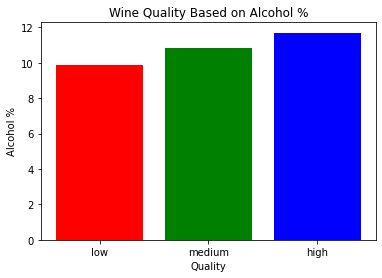

In [111]:
#plt.bar(table.index,table["alcohol"])
plt.xlabel('Quality') 
plt.ylabel('Alcohol %') 
plt.title('Wine Quality Based on Alcohol %') 

#bar plot 
plt.bar(table.index,table["alcohol"],color=['red', "green", "blue"])


<BarContainer object of 3 artists>

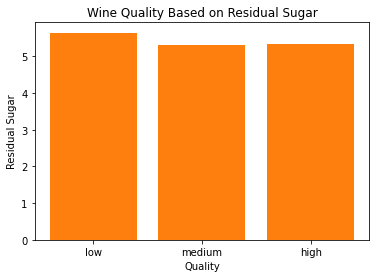

In [109]:
plt.bar(table.index,table["residual sugar"])
plt.xlabel('Quality') 
plt.ylabel('Residual Sugar') 
plt.title('Wine Quality Based on Residual Sugar') 

#bar plot 
plt.bar(table.index,table["residual sugar"])

In [171]:
wines = wines.sort_values(by=["quality"])
wines

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
3113            8.5             0.260         0.21           16.20      0.074   
5566            6.7             0.250         0.26            1.55      0.041   
251             9.1             0.590         0.38            1.60      0.066   
1505            7.9             0.640         0.46           10.60      0.244   
2215            7.4             1.185         0.00            4.25      0.097   
...             ...               ...          ...             ...        ...   
2768            9.1             0.270         0.45           10.60      0.035   
4351            6.9             0.360         0.34            4.20      0.018   
5042            6.6             0.360         0.29            1.60      0.021   
1061            7.1             0.260         0.49            2.20      0.032   
3655            7.4             0.240         0.36            2.00      0.031   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
3113                 41.0                 197.0  0.99800  3.02       0.50   
5566                118.5                 216.0  0.99490  3.55       0.63   
251                  34.0                 182.0  0.99680  3.23       0.38   
1505                 33.0                 227.0  0.99830  2.87       0.74   
2215                  5.0                  14.0  0.99660  3.63       0.54   
...                   ...                   ...      ...   ...        ...   
2768                 28.0                 124.0  0.99700  3.20       0.46   
4351                 57.0                 119.0  0.98980  3.28       0.36   
5042                 24.0                  85.0  0.98965  3.41       0.61   
1061                 31.0                 113.0  0.99030  3.37       0.42   
3655                 27.0                 139.0  0.99055  3.28       0.48   

      alcohol  quality wine_type quality_label  
3113      9.8        3     white           low  
5566      9.4        3     white           low  
251       8.5        3     white           low  
1505      9.1        3     white           low  
2215     10.7        3       red           low  
...       ...      ...       ...           ...  
2768     10.4        9     white          high  
4351     12.7        9     white          high  
5042     12.4        9     white          high  
1061     12.9        9     white          high  
3655     12.5        9     white          high  

[6497 rows x 14 columns]

Text(0.5, 1.0, 'Relation between Wine Quality and Alcohol %')

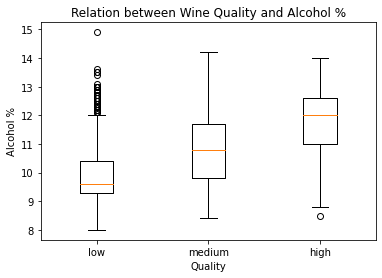

In [267]:
quality_alcohol = {}
for i in wines['quality_label'].unique():
    quality_alcohol[i] = wines[wines['quality_label']==i].alcohol
plt.boxplot([x for x in quality_alcohol.values()],labels=[x for x in quality_alcohol.keys()]) 
#x and y-axis labels 
plt.xlabel('Quality') 
plt.ylabel('Alcohol %') 
#plot title 
plt.title('Relation between Wine Quality and Alcohol %') 


Text(0.5, 1.0, 'Relation between Wine Quality and Alcohol')

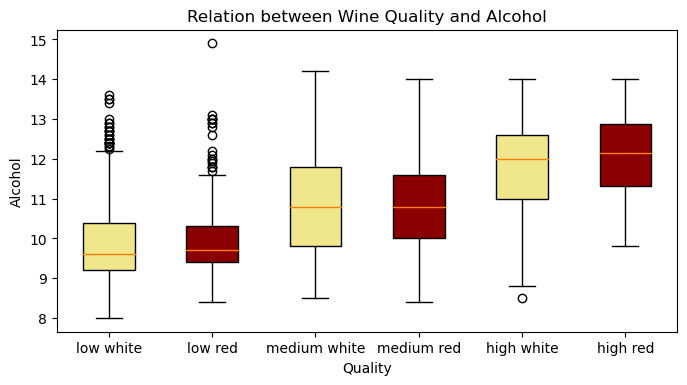

In [315]:
quality_alcohol = {}
colors = []
fig = plt.figure(figsize=(8, 4), dpi=100)
for i in wines['quality_label'].unique():
    for j in wines[wines["quality_label"] == i]["wine_type"].unique():
        label = i + " " + j
        quality_alcohol[label] = wines[(wines['quality_label']==i) & (wines["wine_type"]==j)]["alcohol"]
        colors.append("khaki" if j == "white" else "darkred")
bplot = plt.boxplot([x for x in quality_alcohol.values()],labels=[x for x in quality_alcohol.keys()], patch_artist=True,) 


for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
plt.xlabel('Quality') 
plt.ylabel('Alcohol') 
plt.title('Relation between Wine Quality and Alcohol') 

Text(0.5, 1.0, 'Relation between Wine Quality and Residual Sugar')

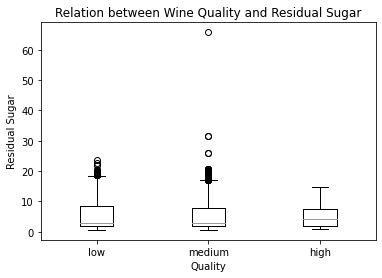

In [187]:
quality_residual_sugar = {}
for i in wines['quality_label'].unique():
    quality_residual_sugar[i] = wines[wines['quality_label']==i]["residual sugar"]
plt.boxplot([x for x in quality_residual_sugar.values()],labels=[x for x in quality_residual_sugar.keys()]) 
#x and y-axis labels 
plt.xlabel('Quality') 
plt.ylabel('Residual Sugar') 
#plot title 
plt.title('Relation between Wine Quality and Residual Sugar') 

Text(0.5, 1.0, 'Relation between Wine Quality and Residual Sugar')

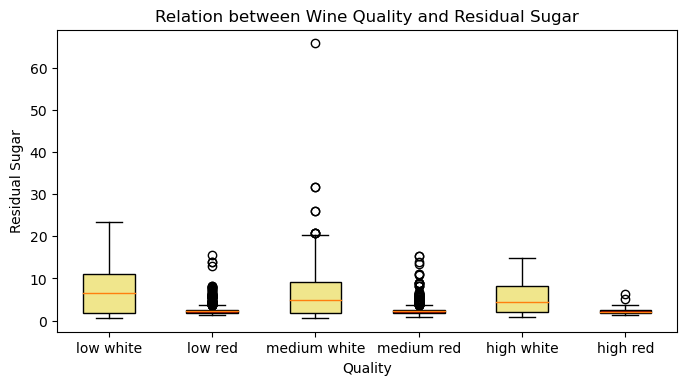

In [262]:
quality_residual_sugar = {}
colors = []
fig = plt.figure(figsize=(8, 4), dpi=100)
for i in wines['quality_label'].unique():
    for j in wines[wines["quality_label"] == i]["wine_type"].unique():
        label = i + " " + j
        quality_sulphates[label] = wines[(wines['quality_label']==i) & (wines["wine_type"]==j)]["residual sugar"]
        colors.append("khaki" if j == "white" else "darkred")
bplot = plt.boxplot([x for x in quality_sulphates.values()],labels=[x for x in quality_sulphates.keys()], patch_artist=True,) 


for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
plt.xlabel('Quality') 
plt.ylabel('Residual Sugar') 
plt.title('Relation between Wine Quality and Residual Sugar') 

Text(0.5, 1.0, 'Relation between Wine Quality and Sulphates')

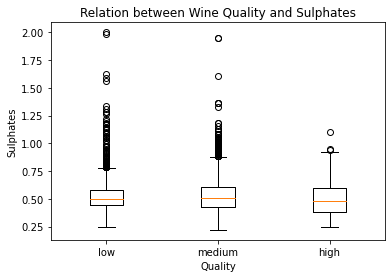

In [265]:
quality_sulphates = {}
for i in wines['quality_label'].unique():
    quality_sulphates[i] = wines[wines['quality_label']==i].sulphates
plt.boxplot([x for x in quality_sulphates.values()],labels=[x for x in quality_sulphates.keys()]) 
#x and y-axis labels 
plt.xlabel('Quality') 
plt.ylabel('Sulphates') 
#plot title 
plt.title('Relation between Wine Quality and Sulphates') 

Text(0.5, 1.0, 'Relation between Wine Quality and Sulphates')

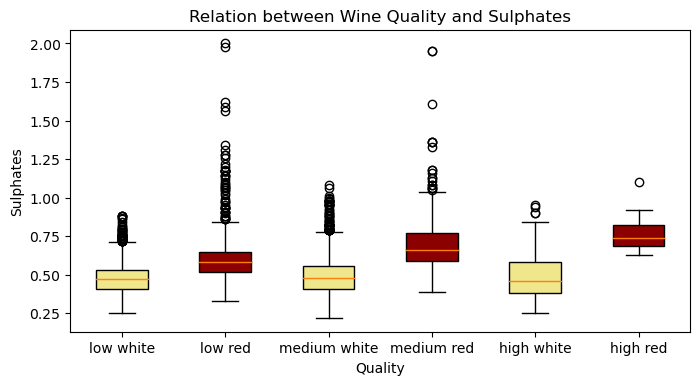

In [266]:
quality_sulphates = {}
colors = []
fig = plt.figure(figsize=(8, 4), dpi=100)
for i in wines['quality_label'].unique():
    for j in wines[wines["quality_label"] == i]["wine_type"].unique():
        label = i + " " + j
        quality_sulphates[label] = wines[(wines['quality_label']==i) & (wines["wine_type"]==j)].sulphates
        colors.append("khaki" if j == "white" else "darkred")
bplot = plt.boxplot([x for x in quality_sulphates.values()],labels=[x for x in quality_sulphates.keys()], patch_artist=True) 
for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
plt.xlabel('Quality') 
plt.ylabel('Sulphates') 
plt.title('Relation between Wine Quality and Sulphates') 

Text(0.5, 1.0, 'Wine Fixed Acidity')

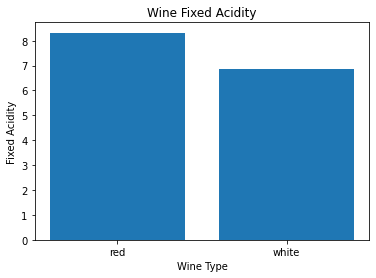

In [313]:

table_2 = pd.pivot_table(wines,index=["wine_type"], values=["fixed acidity"], aggfunc=np.mean)
table_2
#bar graph
plt.bar(table_2.index,table_2['fixed acidity'])

#x-axis labels 
plt.xlabel('Wine Type') 

#y-axis labels 
plt.ylabel('Fixed Acidity') 

#plot title 
plt.title('Wine Fixed Acidity') 

Text(0.5, 1.0, 'Wine Residual Sugar')

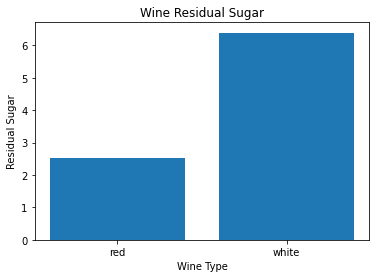

In [314]:
table_3 = pd.pivot_table(wines,index=["wine_type"], values=["residual sugar"], aggfunc=np.mean)
#bar graph
plt.bar(table_3.index,table_3['residual sugar'])

#x-axis labels 
plt.xlabel('Wine Type') 

#y-axis labels 
plt.ylabel('Residual Sugar') 

#plot title 
plt.title('Wine Residual Sugar') 

In [325]:
wines[wines["wine_type"] == "red"]["quality_label"]

2215     low
5228     low
2331     low
191      low
3485     low
        ... 
29      high
158     high
2458    high
1561    high
3200    high
Name: quality_label, Length: 1599, dtype: category
Categories (3, object): [low, medium, high]

AxesSubplot(0.125,0.125;0.352273x0.755)
AxesSubplot(0.547727,0.125;0.352273x0.755)


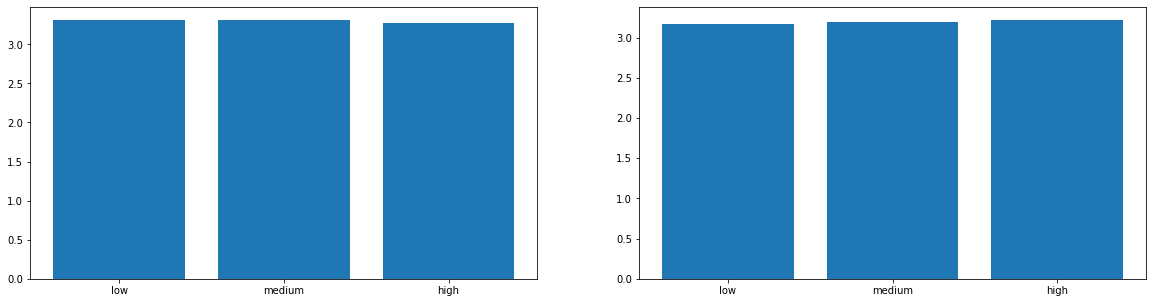

In [13]:
table_red = pd.pivot_table(wines[wines["wine_type"] == "red"],index=[wines[wines["wine_type"] == "red"]["quality_label"]], values=["pH"], aggfunc=np.mean)
table_white = pd.pivot_table(wines[wines["wine_type"] == "white"],index=[wines[wines["wine_type"] == "white"]["quality_label"]], values=["pH"], aggfunc=np.mean)
fig,ax=plt.subplots(1,2,figsize=(20,5)) 
print(ax[0])
print(ax[1])
#bar graph
plt1= ax[0].bar(table_red.index,table_red['pH'])
plt2 = ax[1].bar(table_white.index,table_white['pH'])
#x-axis labels 
# plt1.xlabel('Wine Quality') 
# #y-axis labels 
# plt1.ylabel('pH level') 

# #plot title 
# plt1.title('Red Wine pH level') 



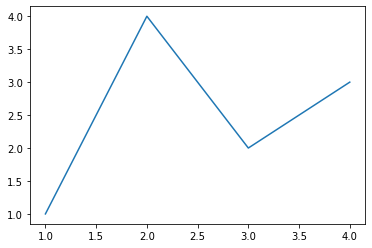

In [271]:
#subplots returns a Figure and an Axes object 
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(20,5)) 

#manipulating the first Axes 
ax[0].plot(red_wine["density"],red_wine["density"]) 
ax[0].set_xlabel('Week') 
ax[0].set_ylabel('Revenue') 
ax[0].set_title('Weekly income') 

#manipulating the second Axes 
ax[1].plot(month,month_order) 
ax[1].set_xlabel('Month') 
ax[1].set_ylabel('Revenue') 
ax[1].set_title('Monthly income') 

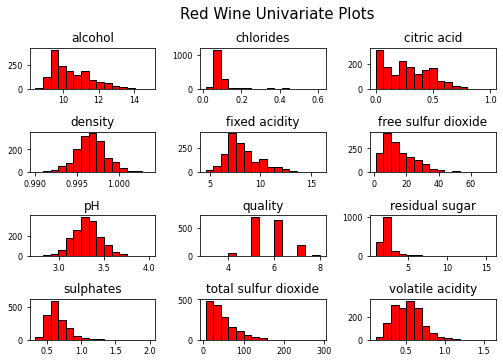

In [5]:
red_wine.hist(bins=15, color='red', edgecolor='black', linewidth=1.0,
xlabelsize=8, ylabelsize=8, grid=False)
plt.tight_layout(rect=(0, 0, 1.2, 1.2))
rt = plt.suptitle('Red Wine Univariate Plots', x=0.65, y=1.25, fontsize=15)

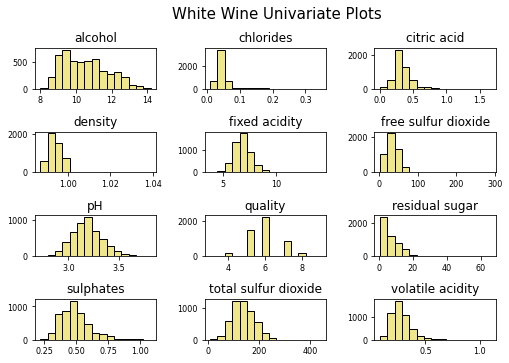

In [6]:
white_wine.hist(bins=15, color='khaki', edgecolor='black', linewidth=1.0,
xlabelsize=8, ylabelsize=8, grid=False)
plt.tight_layout(rect=(0, 0, 1.2, 1.2))
rt = plt.suptitle('White Wine Univariate Plots', x=0.65, y=1.25, fontsize=15)

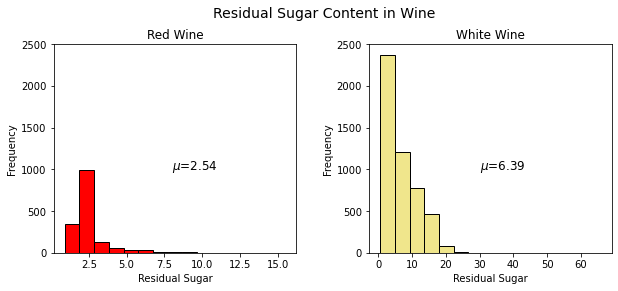

In [8]:
fig = plt.figure(figsize = (10,4))
title = fig.suptitle("Residual Sugar Content in Wine", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)
ax1 = fig.add_subplot(1,2, 1)
ax1.set_title("Red Wine")
ax1.set_xlabel("Residual Sugar")
ax1.set_ylabel("Frequency")
ax1.set_ylim([0, 2500])
ax1.text(8, 1000, r'$\mu$='+str(round(red_wine['residual sugar'].mean(),2)),
fontsize=12)
r_freq, r_bins, r_patches = ax1.hist(red_wine['residual sugar'], color='red', bins=15,
edgecolor='black', linewidth=1)
ax2 = fig.add_subplot(1,2, 2)
ax2.set_title("White Wine")
ax2.set_xlabel("Residual Sugar")
ax2.set_ylabel("Frequency")
ax2.set_ylim([0, 2500])
ax2.text(30, 1000, r'$\mu$='+str(round(white_wine['residual sugar'].mean(),2)),
fontsize=12)
w_freq, w_bins, w_patches = ax2.hist(white_wine['residual sugar'], color='khaki', bins=15,
edgecolor='black', linewidth=1)


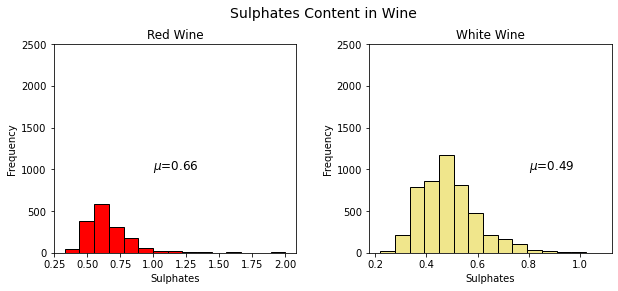

In [17]:
fig = plt.figure(figsize = (10,4))
title = fig.suptitle("Sulphates Content in Wine", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)
ax1 = fig.add_subplot(1,2, 1)
ax1.set_title("Red Wine")
ax1.set_xlabel("Sulphates")
ax1.set_ylabel("Frequency")
ax1.set_ylim([0, 2500])
ax1.text(1, 1000, r'$\mu$='+str(round(red_wine['sulphates'].mean(),2)),
fontsize=12)
r_freq, r_bins, r_patches = ax1.hist(red_wine['sulphates'], color='red', bins=15,
edgecolor='black', linewidth=1)
ax2 = fig.add_subplot(1,2, 2)
ax2.set_title("White Wine")
ax2.set_xlabel("Sulphates")
ax2.set_ylabel("Frequency")
ax2.set_ylim([0, 2500])
ax2.text(0.8, 1000, r'$\mu$='+str(round(white_wine['sulphates'].mean(),2)),
fontsize=12)
w_freq, w_bins, w_patches = ax2.hist(white_wine['sulphates'], color='khaki', bins=15,
edgecolor='black', linewidth=1)

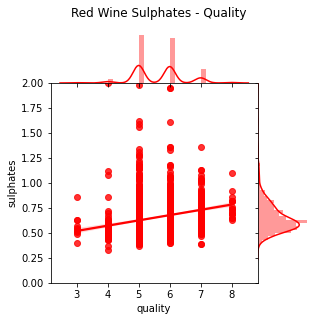

In [24]:
rj = sns.jointplot(x='quality', y='sulphates', data=red_wine,
kind='reg', ylim=(0, 2),
color='red', space=0, size=4.5, ratio=4)
rj.ax_joint.set_xticks(list(range(3,9)))
fig = rj.fig
fig.subplots_adjust(top=0.9)
t = fig.suptitle('Red Wine Sulphates - Quality', fontsize=12);

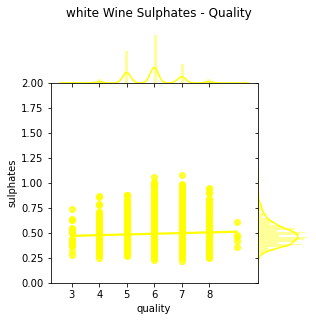

In [27]:
rj = sns.jointplot(x='quality', y='sulphates', data=white_wine,
kind='reg', ylim=(0, 2),
color='yellow', space=0, size=4.5, ratio=4)
rj.ax_joint.set_xticks(list(range(3,9)))
fig = rj.fig
fig.subplots_adjust(top=0.9)
t = fig.suptitle('white Wine Sulphates - Quality', fontsize=12);

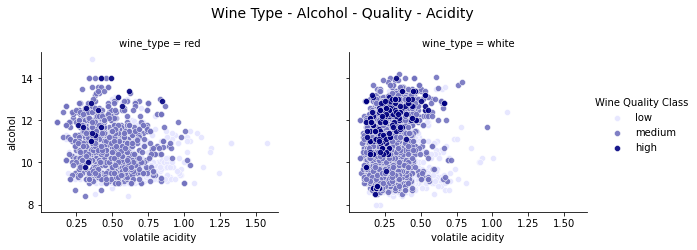

In [28]:
g = sns.FacetGrid(wines, col="wine_type", hue='quality_label',
col_order=['red', 'white'], hue_order=['low', 'medium', 'high'],
aspect=1.2, size=3.5, palette=sns.light_palette('navy', 3))
g.map(plt.scatter, "volatile acidity", "alcohol", alpha=0.9,
edgecolor='white', linewidth=0.5)
fig = g.fig
fig.subplots_adjust(top=0.8, wspace=0.3)
fig.suptitle('Wine Type - Alcohol - Quality - Acidity', fontsize=14)
l = g.add_legend(title='Wine Quality Class')

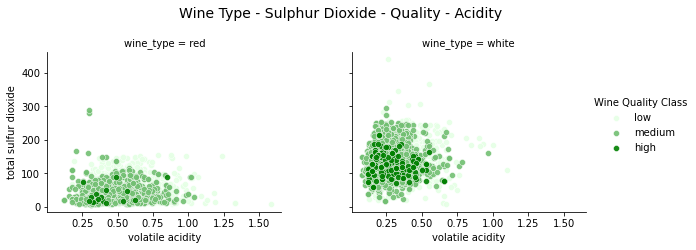

In [31]:
g = sns.FacetGrid(wines, col="wine_type", hue='quality_label',
col_order=['red', 'white'], hue_order=['low', 'medium', 'high'],
aspect=1.2, size=3.5, palette=sns.light_palette('green', 3))
g.map(plt.scatter, "volatile acidity", "total sulfur dioxide", alpha=0.9,
edgecolor='white', linewidth=0.5)
fig = g.fig
fig.subplots_adjust(top=0.8, wspace=0.3)
fig.suptitle('Wine Type - Sulphur Dioxide - Quality - Acidity', fontsize=14)
l = g.add_legend(title='Wine Quality Class')

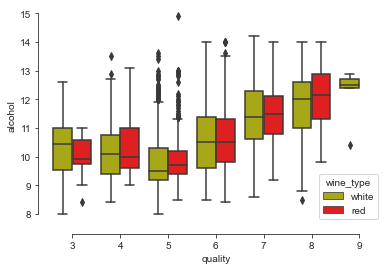

In [55]:
# sns.set_theme(style="ticks", palette="pastel")
# sns.set_palette("pastel")
sns.color_palette("pastel")
sns.set_style("ticks")
# Load the example tips dataset
# wines = sns.load_dataset("wines")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="quality", y="alcohol",
            hue="wine_type", palette=["y", "r"],
            data=wines)

sns.despine(offset=10, trim=True)

In [58]:
import seaborn as sns
sns.set(style="ticks", palette="pastel")

# Load the example tips dataset
# tips = sns.load_dataset("tips")

# Draw a nested boxplot to show bills by day and time


In [ ]:
sns.boxplot(x="quality_label", y="alcohol",
            hue="wine_type", palette=["m", "g"],
            data=wines)
sns.despine(offset=10, trim=True)

In [61]:
sns.__version__


'0.10.1'